In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# DataFrames 
players = pd.read_csv("datasets/players.csv")
players_stats = pd.read_csv("datasets/player_szn_stats.csv")
nba_teams = pd.read_csv("datasets/teams.csv")
szn_types = pd.read_csv("datasets/szn_types.csv")
szn_stats = pd.read_csv("datasets/Seasons_Stats.csv") 


In [2]:
def clean_name(s: str):
    """
    cleans the name of the players, in the szn stats dataset some have a '*' at the end of their name
    """
    if isinstance(s, str) and s.endswith("*"):
        return s[:-1]
    return s

In [3]:
szn_stats["Player"] = szn_stats["Player"].apply(clean_name)

In [21]:
merged = players_stats.merge(nba_teams, on="team_id")
merged = merged.merge(players, on="player_id")
merged["player_name"] = merged["first_name"] + " " + merged["last_name"]
merged = merged[["player_id", "full_name", "season_id", "player_name", "league_id_x", "minutes", "weight_lb"]].drop_duplicates()


### Descriptive analysis of the dataset

Lets take a look at who are the players and teams that have performed the best over the years. For this analysis we will only be looking at the NBA, and regular season statistics.


In [22]:
top_scoring_players = szn_stats[["Player", "PTS", "Year"]].groupby("Player").sum().sort_values(by="PTS", ascending=False).head(5)
top_players = top_scoring_players.index

In [25]:
player_with_teams = szn_stats.merge(merged, left_on="Player", right_on="player_name")

In [26]:
top_scoring_teams = player_with_teams.groupby("full_name").sum().sort_values(by="PTS", ascending=False).head(5)
top_teams = top_scoring_teams.index

<Axes: title={'center': 'Top Scoring teams all Time'}, xlabel='Team', ylabel='Total Points'>

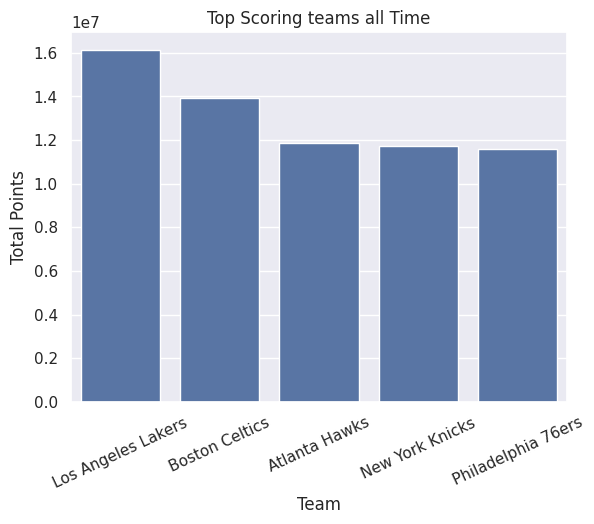

In [27]:
def plot_top_scoring_teams():
    """
    returns an axes with the top scoring teams all time as of 2020
    """
    plot = sns.barplot(data=top_scoring_teams.reset_index(), y="PTS", x="full_name")
    plot.set(title="Top Scoring teams all Time", xlabel="Team", ylabel="Total Points")
    plot.tick_params(axis="x", rotation=25)

    return plot

plot_top_scoring_teams()

<Axes: title={'center': 'Top Scoring teams over Time'}, xlabel='Year', ylabel='Total Points'>

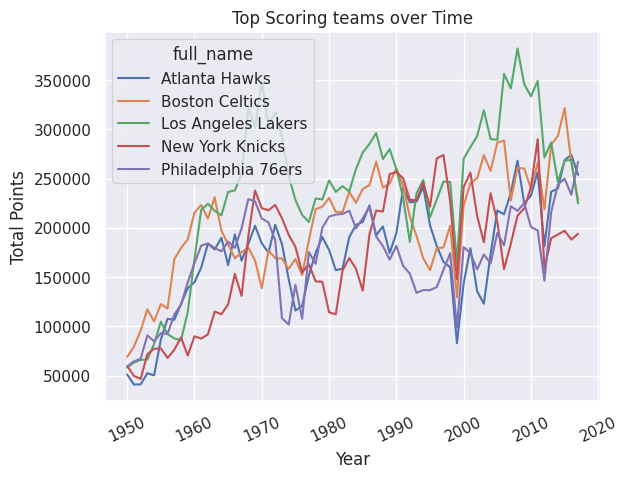

In [28]:
def plot_top_scoring_teams_over_time():
    team_points_per_year = player_with_teams[player_with_teams["full_name"].isin(top_teams)].groupby(["full_name", "Year"]).sum().reset_index()
    plot = sns.lineplot(data=team_points_per_year, x="Year", y="PTS", hue="full_name")
    plot.set(title="Top Scoring teams over Time", xlabel="Year", ylabel="Total Points")
    plot.tick_params(axis="x", rotation=25)
    return plot

plot_top_scoring_teams_over_time()
    

<Axes: title={'center': 'Top Scoring players'}, xlabel='Player', ylabel='Points'>

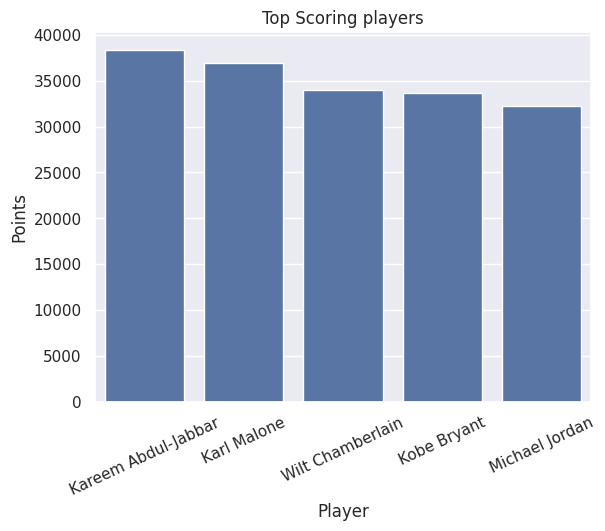

In [29]:
def plot_top_scoring_players():
    plot = sns.barplot(data=top_scoring_players, y="PTS", x="Player")
    plot.set(title="Top Scoring players", ylabel="Points")
    plot.tick_params(axis="x", rotation=25)
    return plot

plot_top_scoring_players()

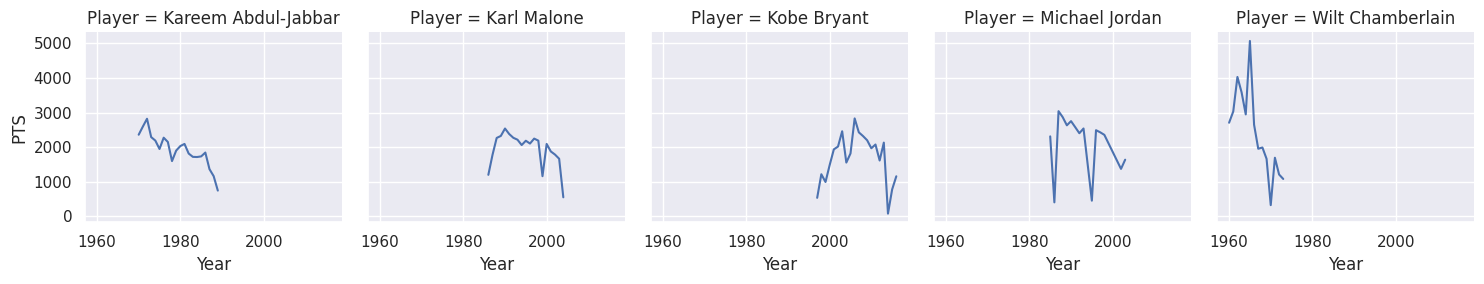

In [31]:
def plot_top_scoring_players_over_time():

    players_per_year = szn_stats[szn_stats["Player"].isin(top_players)].groupby(["Player", "Year"]).sum().reset_index()
    g = sns.FacetGrid(players_per_year, col="Player", sharex=False col_wrap=3)
    g.map(sns.lineplot, "Year", "PTS", )
    return g
    # plot = sns.relplot(data=players_per_year, x="Year", y="PTS", hue="Player", kind="line")
    # plot.set(title="Top 5 Scoring players over the Years")
    # return plot

plot_top_scoring_players_over_time()

But are these really the best players? What if a player or team has played more games. Let's take a look at averages during the years, and see if there is anything that changes. 

In [ ]:
def get_players_with_highest_pts_avg(): 
    